In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import random

In [2]:
import pandas as pd

df = pd.read_csv("the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data.csv")

In [3]:
patient_id = list(df["Patient ID"])
recording_loc = list(df["Recording locations:"])
murmur = list(df["Murmur"])
murmur_loc = list(df["Murmur locations"])
systolic_murmur_timing = list(df["Systolic murmur timing"])
print(patient_id)
print(recording_loc)
print(murmur)
print(murmur_loc)
print(systolic_murmur_timing)

[2530, 9979, 9983, 13918, 14241, 14998, 23625, 24160, 29045, 29378, 31737, 33151, 36327, 38337, 39043, 39403, 39456, 40058, 40798, 40840, 43852, 44514, 45843, 46065, 46532, 46579, 46778, 47002, 49558, 49561, 49562, 49568, 49572, 49574, 49577, 49585, 49595, 49598, 49607, 49610, 49618, 49622, 49627, 49628, 49630, 49631, 49638, 49641, 49653, 49659, 49661, 49669, 49678, 49683, 49687, 49691, 49704, 49712, 49719, 49729, 49735, 49745, 49748, 49751, 49754, 49761, 49776, 49808, 49821, 49823, 49824, 49829, 49832, 49838, 49839, 49842, 49850, 49853, 49854, 49873, 49876, 49896, 49897, 49900, 49930, 49931, 49946, 49952, 49959, 49960, 49963, 49966, 49968, 49969, 49970, 49974, 49978, 49979, 49980, 49983, 49986, 49987, 49988, 49989, 49990, 49993, 49994, 49995, 49998, 49999, 50001, 50004, 50005, 50006, 50007, 50008, 50009, 50012, 50014, 50015, 50017, 50018, 50023, 50026, 50027, 50029, 50030, 50032, 50034, 50037, 50043, 50047, 50048, 50049, 50053, 50054, 50056, 50057, 50061, 50066, 50067, 50070, 50072, 5

In [4]:
recording_loc = [x.split("+") for x in recording_loc]

for i in range(len(murmur_loc)):
    if murmur_loc[i] is np.nan:
        murmur_loc[i] = []
    else:
        murmur_loc[i] = murmur_loc[i].split("+")

In [5]:
X = []
y = []

for i in range(len(patient_id)):
    if murmur[i] == "Absent":
        for recloc in recording_loc[i]:
            full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
            initial = 0
            while (initial+400) <= len(full_recording):
                X.append(full_recording[initial:initial+400])
                y.append([1, 0, 0, 0, 0])
                initial += 200
    elif murmur[i] == "Present":
        for recloc in recording_loc[i]:
            if recloc in murmur_loc[i]:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                if systolic_murmur_timing[i] == "Holosystolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 1, 0, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Early-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 1, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Mid-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 1, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Late-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 0, 1])
                        initial += 200
                else:
                    print("Error on patient ID:", patient_id[i])
            else:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                while (initial+400) <= len(full_recording):
                    X.append(full_recording[initial:initial+400])
                    y.append([1, 0, 0, 0, 0])
                    initial += 200

Error on patient ID: 85119
Error on patient ID: 85119


In [6]:
time_steps = 400
feature_length = 18
batch_size = 3

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25)

In [8]:
X_train_final = []
y_train_final = []

for i in range(len(X_train)):
    if y_train[i] == [1, 0, 0, 0, 0]:
        #randnum = random.uniform(0, 1)
        randnum = random.random()
        if randnum >= 0.66:
            X_train_final.append(X_train[i])
            y_train_final.append(y_train[i])
    else:
        X_train_final.append(X_train[i])
        y_train_final.append(y_train[i])

In [9]:
print(len(X_train), len(y_train))
print(len(X_train_final), len(y_train_final))
print(len(X_test), len(y_test))

22341 22341
10015 10015
7447 7447


In [10]:
model = Sequential()
model.add(LSTM(18))
model.add(Dense(18, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(5, activation="sigmoid"))

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_final = np.array(X_train_final)
y_train_final = np.array(y_train_final)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [13]:
model.fit(X_train_final, y_train_final, epochs=10, batch_size=batch_size)

Epoch 1/10


3339/3339 [==============================] - 139s 41ms/step - loss: 0.3506 - accuracy: 0.6268
Epoch 2/10
3339/3339 [==============================] - 133s 40ms/step - loss: 0.3410 - accuracy: 0.6296
Epoch 3/10
3339/3339 [==============================] - 131s 39ms/step - loss: 0.3404 - accuracy: 0.6299
Epoch 4/10
3339/3339 [==============================] - 127s 38ms/step - loss: 0.3386 - accuracy: 0.6295
Epoch 5/10
3339/3339 [==============================] - 127s 38ms/step - loss: 0.3363 - accuracy: 0.6300
Epoch 6/10
3339/3339 [==============================] - 127s 38ms/step - loss: 0.3361 - accuracy: 0.6351
Epoch 7/10
3339/3339 [==============================] - 126s 38ms/step - loss: 0.3399 - accuracy: 0.6321
Epoch 8/10
3339/3339 [==============================] - 127s 38ms/step - loss: 0.3399 - accuracy: 0.6323
Epoch 9/10
3339/3339 [==============================] - 138s 41ms/step - loss: 0.3398 - accuracy: 0.6331
Epoch 10/10
3339/3339 [==============================

In [14]:
final_final_predicts = model.predict(X_test)
final_final_predicts.shape

233/233 [==============================] - 4s 14ms/step


(7447, 5)

In [15]:
X = np.array(X)
y = np.array(y)
score_full = model.evaluate(X, y, batch_size=batch_size, verbose=0)
print('Test loss:', score_full[0])
print('Accuracy:', score_full[1])

Test loss: 0.24662810564041138
Accuracy: 0.8309721946716309


In [16]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Accuracy:', score[1])

Test loss: 0.24394497275352478
Accuracy: 0.8342956900596619


In [17]:
final_final_predicts

array([[0.46412176, 0.34187645, 0.13119847, 0.05446994, 0.00240321],
       [0.5515698 , 0.2626442 , 0.12180722, 0.04656414, 0.00156451],
       [0.71661186, 0.16325144, 0.09797478, 0.02709353, 0.00131864],
       ...,
       [0.7170825 , 0.16301374, 0.09790189, 0.02703993, 0.00131931],
       [0.7157432 , 0.16366825, 0.09810073, 0.02719448, 0.00131708],
       [0.7157548 , 0.16366437, 0.09809963, 0.02719299, 0.00131713]],
      dtype=float32)

In [18]:
for i in range(len(final_final_predicts)):
    if max(final_final_predicts[i]) != final_final_predicts[i][0]:
        print(i, final_final_predicts[i])

209 [0.38622057 0.41165748 0.12356949 0.06537824 0.00290521]
217 [0.39249176 0.4077869  0.12644783 0.06378924 0.0028953 ]
224 [0.36692864 0.42944044 0.12191921 0.0681783  0.00300379]
244 [0.39493847 0.4041457  0.12474331 0.06397969 0.00284754]
395 [0.39964843 0.4000102  0.1256127  0.06318118 0.00283458]
452 [0.35031474 0.44352573 0.11897791 0.07121228 0.00306263]
559 [0.37656397 0.4208349  0.12300599 0.06671994 0.00296306]
688 [0.3577442  0.43716794 0.12009732 0.06994119 0.0030369 ]
829 [0.3325383  0.45931667 0.1167074  0.07423787 0.00313628]
1004 [0.37332365 0.4242258  0.12345062 0.06691238 0.0029777 ]
1020 [0.3852909  0.4122559  0.12306143 0.06562209 0.0028905 ]
1030 [0.3852426  0.4139679  0.12537742 0.06494201 0.00293239]
1187 [0.3523143  0.44282198 0.12061213 0.07039527 0.00308106]
1287 [0.39137352 0.40916708 0.12670559 0.06383885 0.00290017]
1332 [0.379238   0.41813916 0.12295835 0.0663944  0.00293513]
1334 [0.37858355 0.4192673  0.12377265 0.0662048  0.00295235]
1485 [0.35720518 

In [19]:
full_predicts = model.predict(X)
full_predicts

931/931 [==============================] - 13s 13ms/step


array([[0.71574765, 0.16366681, 0.09810033, 0.02719391, 0.0013171 ],
       [0.7151793 , 0.16387694, 0.09815973, 0.02726579, 0.00131476],
       [0.71574765, 0.16366681, 0.09810033, 0.02719391, 0.0013171 ],
       ...,
       [0.57762885, 0.24096484, 0.11793376, 0.04413203, 0.00135119],
       [0.6969191 , 0.17227145, 0.10048187, 0.02951827, 0.00126384],
       [0.71574765, 0.16366681, 0.09810033, 0.02719391, 0.0013171 ]],
      dtype=float32)

In [20]:
for i in range(len(full_predicts)):
    if max(full_predicts[i]) != full_predicts[i][0]:
        print(i, full_predicts[i])

56 [0.39729977 0.4021338  0.1251633  0.06358779 0.00284315]
100 [0.37332365 0.4242258  0.12345062 0.06691238 0.0029777 ]
196 [0.36069432 0.4348934  0.12116543 0.06916886 0.00303133]
298 [0.38622057 0.41165748 0.12356949 0.06537824 0.00290521]
496 [0.3325383  0.45931667 0.1167074  0.07423787 0.00313628]
512 [0.39690113 0.40199327 0.12444832 0.06385306 0.00283448]
647 [0.36443463 0.43189672 0.12178981 0.06852862 0.00301668]
680 [0.38439527 0.41409782 0.12447979 0.06530569 0.00292444]
681 [0.3968984  0.40199503 0.124447   0.06385373 0.00283446]
683 [0.39569467 0.40406087 0.12582977 0.06362157 0.00288242]
684 [0.39742172 0.4020481  0.125214   0.06356022 0.0028437 ]
800 [0.39958292 0.40006968 0.12560646 0.06319058 0.00283494]
831 [0.39690155 0.40199295 0.12444852 0.06385294 0.00283449]
857 [0.37541372 0.42179406 0.12272459 0.06690826 0.00295303]
942 [0.3577442  0.43716794 0.12009732 0.06994119 0.0030369 ]
1129 [0.38077    0.41716352 0.1238299  0.06594546 0.00294775]
1157 [0.39336085 0.40643

In [21]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     29445
           1       0.03      0.21      0.05       343
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.83     29788
   macro avg       0.20      0.21      0.19     29788
weighted avg       0.98      0.83      0.90     29788



C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
model_conf = confusion_matrix(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_conf)

[[24680  2824  1446   476    19]
 [  217    73    29    24     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [45]:
#from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 5 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], final_final_predicts[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), final_final_predicts.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

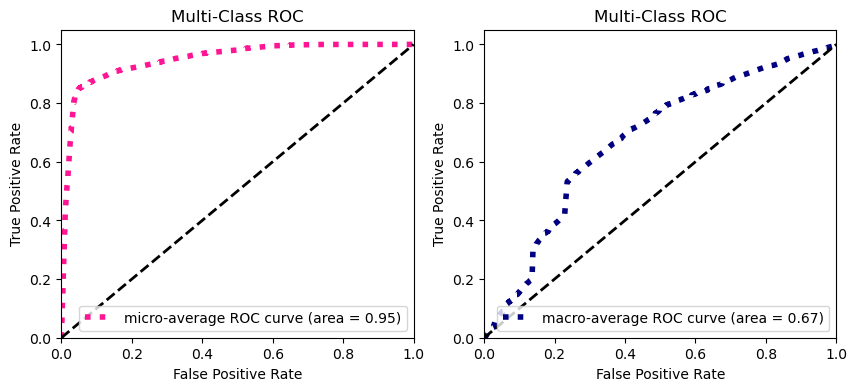

In [48]:
n_classes = 5

# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

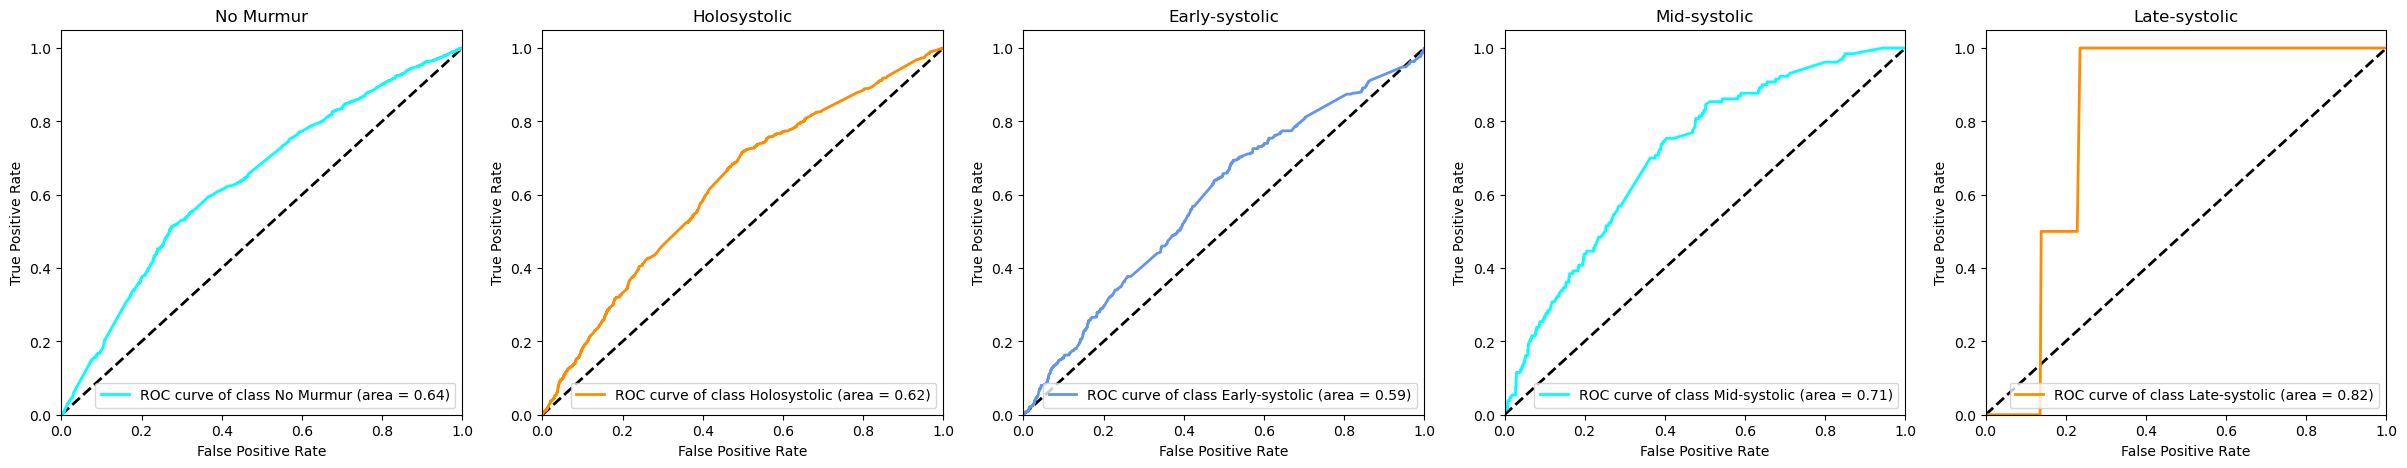

In [52]:
plt.close()
plt.figure(figsize=(30, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
title = ['No Murmur', "Holosystolic", "Early-systolic", "Mid-systolic", "Late-systolic"]
for i, color in zip(range(n_classes), colors):
    if i == 0:
        plt.subplot(151)
    elif i == 1:
        plt.subplot(152)
    elif i == 2:
        plt.subplot(153)
    elif i == 3:
        plt.subplot(154)
    else:
        plt.subplot(155)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(title[i], roc_auc[i]))
    plt.legend(loc="lower right")
    
plt.show()